# Test 


In [22]:
%load_ext autoreload
%autoreload 2
%load_ext watermark

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from src.processors.Preprocessor import Preprocessor

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

from src.model_experimentation.ltsm_model_experimentation import validated_tf

import tensorflow as tf


In [15]:
validated_tf()


TensorFlow version: 2.12.0


GPU Info: NVIDIA drivers do not appear to be installed on this machine.



Test data

In [41]:
X_test = pd.read_parquet('/projects/p31961/dopamine_modeling/data/prototype_data/X_test.parquet.gzip')
y_test = pd.read_parquet('/projects/p31961/dopamine_modeling/data/prototype_data/y_test.parquet.gzip')

In [26]:
ltsm_model = tf.keras.models.load_model('/projects/p31961/dopamine_modeling/results/models/ltsm_prototype')

2023-05-31 13:57:42.141636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2023-05-31 13:57:42.141851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2023-05-31 13:57:42.141959: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [31]:
prediction = ltsm_model.predict(X_test)

1982/1982 [==============================] - 5s 3ms/step


In [32]:
prediction.shape

(63401, 1)

In [43]:
combined_data = X_test.assign(true_signal = y_test,
                              predicted_signal = prediction)
combined_data.head()

,day,time,trial,event_avoid,sensor_DA,true_signal,predicted_signal
274662,7,-25.000000,6,1,1,0.687229,-1.602217
274663,7,-24.999018,6,1,1,0.681288,-1.602723
274664,7,-24.998034,6,1,1,0.675351,-1.603229
274665,7,-24.997051,6,1,1,0.669418,-1.603732
274667,7,-24.995085,6,1,1,0.657564,-1.604739


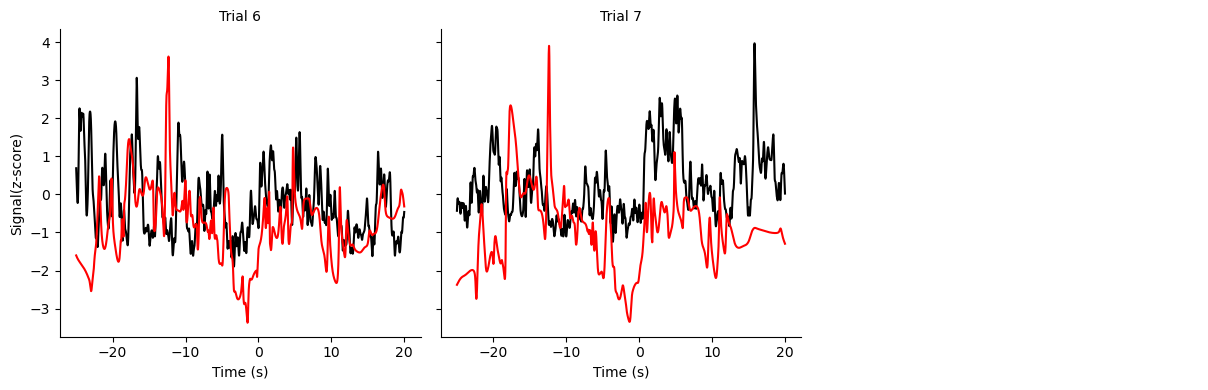

In [57]:
g = sns.FacetGrid(combined_data, col="trial", col_wrap=3, height=4)
g.map(sns.lineplot, "time", "true_signal", color = 'black')
g.map(sns.lineplot, "time", "predicted_signal", color='red')
g.set_titles("Trial {col_name}")
g.set_axis_labels("Time (s)", "Signal(z-score)")
g.add_legend()
plt.show()


In [52]:
(
    so.Plot(data = combined_data,
            x = 'time',
            y = 'predicted_signal')
            .add(so.Line()),
    so.Plot(data = combined_data,
            x = 'time',
            y = 'true_signal')
            .add(so.Line())
    
)
plt.show()